In [1]:
"""
Function to compute the execution time.

"""
from datetime import timedelta
import time
def get_time(f, kwargs={}):
    times = []
    result = None
    for i in range(2):
        print("\nmeasure",i+1)
        t = time.time()
        result = f(**kwargs)
        times.append(time.time()-t)
        
    print("\nall times:", times)
    a = min(times)
    b = max(times)
    print("times' outliers:",a,"&",b)
    t = abs(sum(times)-a-b)
    print("benchmark time",str(t)+"s","or", timedelta(seconds=t))
    return result

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from pymeos import *
import numpy as np
import contextily as cx
from pymeos.temporal import interpolation
pymeos_initialize()

In [3]:



def load_ships_trajectories(df_):
    df = df_.copy()
    df = df.dropna()
    df["Timestamp"] = pd.to_datetime(df["Timestamp"],format="mixed")
    df = df.sort_values(by="Timestamp")
    df = df.drop_duplicates(["Timestamp"])
    print('point number',len(df))
    df['point'] = df.apply(lambda row: TGeogPointInst(point=(row['Latitude'], row['Longitude']), timestamp=row['Timestamp']),axis=1)
    df['SOG'] = df.apply(lambda row: TFloatInst(value=row['SOG'] or 0 , timestamp=row['Timestamp']), axis=1)
    df['ROT'] = df.apply(lambda row: TFloatInst(value=row['ROT']or 0, timestamp=row['Timestamp']), axis=1)
    df['Heading'] = df.apply(lambda row: TFloatInst(value=row['Heading'] or 0, timestamp=row['Timestamp']), axis=1)
    df.drop(['Latitude', 'Longitude'], axis=1, inplace=True)
    trajectories = df.groupby('id').aggregate(
        {
            'point': lambda x: TGeogPointSeq.from_instants(x, lower_inc=True,upper_inc=True,interpolation=interpolation.TInterpolation.DISCRETE),
            # 'SOG':  lambda x: TFloatSeq.from_instants(x, lower_inc=True,upper_inc=True),
            # 'ROT': lambda x: TFloatSeq.from_instants(x, lower_inc=True,upper_inc=True),
            # 'Heading': lambda x: TFloatSeq.from_instants(x, lower_inc=True,upper_inc=True)
        }
    ).rename({'point': 'trajectory'}, axis=1)
    return trajectories

def load_cars_trajectories(df_):
    df = df_.copy()
    df["Timestamp"] = pd.to_datetime(df["Timestamp"], format="mixed")
    df = df.sort_values(by="Timestamp")
    df = df.drop_duplicates(["Timestamp"])
    df['point'] = df.apply(lambda row: TGeogPointInst(point=(row['Longitude'], row['Latitude']), timestamp=row['Timestamp']),axis=1)
    df.drop(['Latitude', 'Longitude'], axis=1, inplace=True)
    trajectories = df.groupby('id').aggregate(
    {
        'point': TGeogPointSeq.from_instants,
    }
    ).rename({'point': 'trajectory'}, axis=1)
    return trajectories

# load trajectories

In [4]:
SIZE ="small"

In [5]:
PATH='../../datasets/berlinMOD_'+SIZE+'.csv'
df = pd.read_csv(PATH)
trajectories = load_cars_trajectories(df)

In [49]:
trajectories

,trajectory
id,
8,[0101000020E610000037B3EBDE8ADC1140687C04A3376...
141,[0101000020E6100000060660A868F91140DB6BE6351B6...


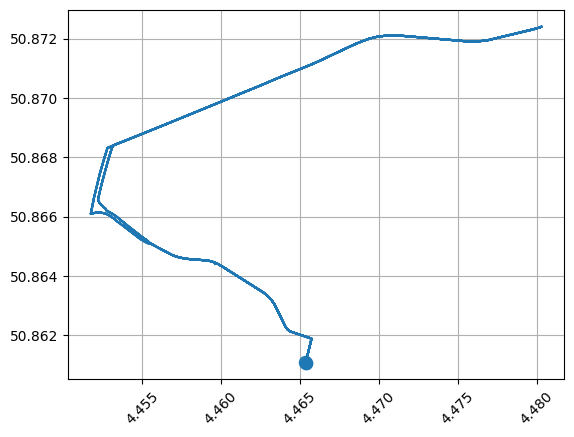

In [50]:
trajectories["trajectory"].values[0].plot()


measure 1


/home/pierre-cedric/miniconda3/envs/pymeos/lib/python3.11/site-packages/contextily/tile.py:620: UserWarning: The inferred zoom level of 28 is not valid for the current tile provider (valid zooms: 0 - 19).
  warnings.warn(msg)


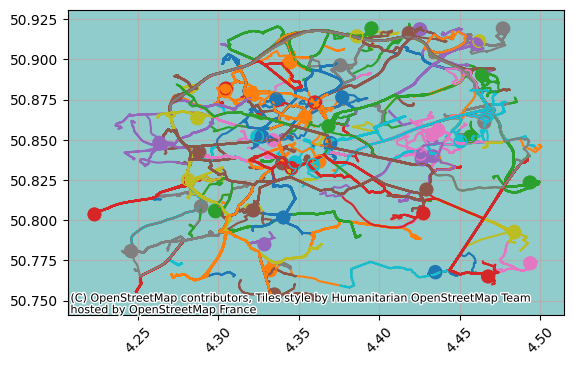


measure 2


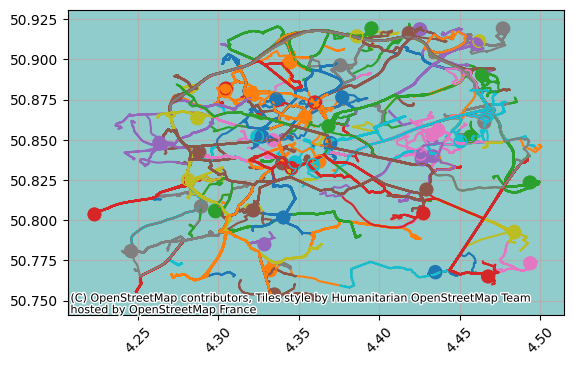


all times: [10.057477474212646, 12.094452142715454]
times' outliers: 10.057477474212646 & 12.094452142715454
benchmark time 0.0s or 0:00:00


In [6]:
def plot_trajectories(df):
    fig, ax = plt.subplots()
    for _, trip in df.iterrows():
        trip['trajectory'].plot(axes=ax)
    cx.add_basemap(ax)
    plt.show()


get_time(plot_trajectories,{"df":trajectories})

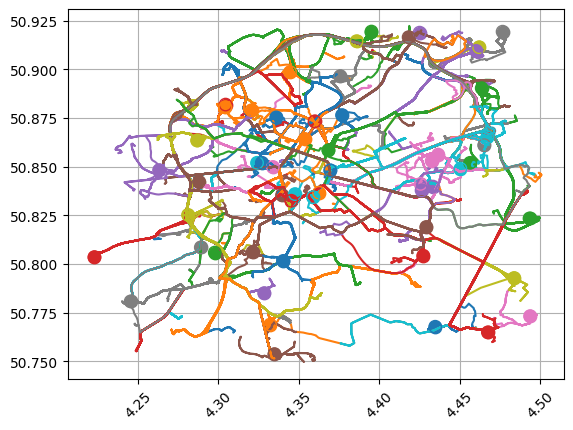

In [7]:
def plot_trajectories(df):
    fig, ax = plt.subplots()
    for _, trip in df.iterrows():
        trip['trajectory'].plot(axes=ax)
    plt.show()

plot_trajectories(trajectories)